In [2]:
!pip install anomalib==2.2.0 torch torchvision pytorch-lightning torchmetrics opencv-python

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.8/851.8 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.5/828.5 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 55.6 MB/s eta 0:00:00
  Created wheel for freia: filename=FrEIA-0.2-py3-none-any.whl size=42763 sha256=ec8735a9a73208569a6b98caf0d2e23c861dc8ebcef53a71d8d9559b7fab14a9
  Stored in directory: /root/.cache/pip/wheels/ae/40/63/f30f17a00a5c53f982c5c222995b53fe1ee51

In [3]:
from anomalib.data import MVTecAD
from anomalib.models import Patchcore
from anomalib.engine import Engine
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")

categories = ["grid", "leather", "tile"]
results = {}

GPU is available!
GPU Name: NVIDIA A100-SXM4-40GB


In [10]:
for category in categories:
    print(f"\n{'='*60}\nProcessing category: {category}\n{'='*60}")

    # this will load the MVTech module
    mvt_module = MVTecAD(
        root="datasets/MVTecAD",
        category=category,
        train_batch_size=32,
        eval_batch_size=32,
        num_workers=4,
    )

    # preprossors point which is the image size and cropped size
    preprocessor = Patchcore.configure_pre_processor(
        image_size=(256, 256),
        center_crop_size=(224, 224)
    )

    # this is the pretrained model
    patchcore_model = Patchcore(
        backbone="wide_resnet50_2",
        layers=["layer2", "layer3"],
        coreset_sampling_ratio=0.1,
        pre_trained=True,
        pre_processor=preprocessor
    )

    # initialize the engine
    engine = Engine()

    # this will train the model
    engine.fit(model= patchcore_model , datamodule= mvt_module )

    # and this will test the model
    metrics = engine.test(model= patchcore_model , datamodule= mvt_module)

    # we know need to extract the AUROC metrics which is in a dictonary within a list
    metrics = metrics[0]
    image_auroc = metrics["image_AUROC"]
    pixel_auroc = metrics["pixel_AUROC"]
    results[category] = {"image_AUROC": image_auroc, "pixel_AUROC": pixel_auroc}


Processing category: grid


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'pre_processor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['pre_processor'])`.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | pre_processor  | PreProcessor   | 0      | train
1 | p

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/20697 [00:00<?, ?it/s]

Selecting Coreset Indices.:   1%|          | 137/20697 [00:00<00:15, 1368.01it/s]

Selecting Coreset Indices.:   1%|▏         | 285/20697 [00:00<00:14, 1428.05it/s]

Selecting Coreset Indices.:   2%|▏         | 432/20697 [00:00<00:14, 1445.50it/s]

Selecting Coreset Indices.:   3%|▎         | 579/20697 [00:00<00:13, 1451.35it/s]

Selecting Coreset Indices.:   4%|▎         | 726/20697 [00:00<00:13, 1456.48it/s]

Selecting Coreset Indices.:   4%|▍         | 873/20697 [00:00<00:13, 1459.65it/s]

Selecting Coreset Indices.:   5%|▍         | 1020/20697 [00:00<00:13, 1462.90it/s]

Selecting Coreset Indices.:   6%|▌         | 1168/20697 [00:00<00:13, 1466.92it/s]

Selecting Coreset Indices.:   6%|▋         | 1315/20697 [00:00<00:13, 1466.41it/s]

Selecting Coreset Indices.:   7%|▋         | 1462/20697 [00:01<00:13, 1466.38it/s]

Selecting Coreset Indices.:   8%|▊         | 1609/20697 [00:01<00:13, 1465.55it/s]

Selecting

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9774436950683594     │
│       image_F1Score       │     0.95652174949646      │
│        pixel_AUROC        │    0.9795893430709839     │
│       pixel_F1Score       │    0.37905368208885193    │
└───────────────────────────┴───────────────────────────┘


Processing category: leather


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'pre_processor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['pre_processor'])`.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | pre_processor  | PreProcessor   | 0      | train
1 | p

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/19208 [00:00<?, ?it/s]

Selecting Coreset Indices.:   1%|          | 149/19208 [00:00<00:12, 1487.19it/s]

Selecting Coreset Indices.:   2%|▏         | 308/19208 [00:00<00:12, 1545.57it/s]

Selecting Coreset Indices.:   2%|▏         | 470/19208 [00:00<00:11, 1578.52it/s]

Selecting Coreset Indices.:   3%|▎         | 628/19208 [00:00<00:11, 1572.87it/s]

Selecting Coreset Indices.:   4%|▍         | 790/19208 [00:00<00:11, 1588.37it/s]

Selecting Coreset Indices.:   5%|▍         | 952/19208 [00:00<00:11, 1597.38it/s]

Selecting Coreset Indices.:   6%|▌         | 1114/19208 [00:00<00:11, 1603.22it/s]

Selecting Coreset Indices.:   7%|▋         | 1275/19208 [00:00<00:11, 1590.17it/s]

Selecting Coreset Indices.:   7%|▋         | 1435/19208 [00:00<00:11, 1574.90it/s]

Selecting Coreset Indices.:   8%|▊         | 1594/19208 [00:01<00:11, 1578.23it/s]

Selecting Coreset Indices.:   9%|▉         | 1756/19208 [00:01<00:10, 1588.21it/s]

Selecting

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │     0.994535505771637     │
│        pixel_AUROC        │    0.9900263547897339     │
│       pixel_F1Score       │    0.44382598996162415    │
└───────────────────────────┴───────────────────────────┘


Processing category: tile


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'pre_processor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['pre_processor'])`.
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | pre_processor  | PreProcessor   | 0      | train
1 | p

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/18032 [00:00<?, ?it/s]

Selecting Coreset Indices.:   1%|          | 146/18032 [00:00<00:12, 1455.92it/s]

Selecting Coreset Indices.:   2%|▏         | 300/18032 [00:00<00:11, 1504.99it/s]

Selecting Coreset Indices.:   3%|▎         | 465/18032 [00:00<00:11, 1566.94it/s]

Selecting Coreset Indices.:   3%|▎         | 630/18032 [00:00<00:10, 1598.83it/s]

Selecting Coreset Indices.:   4%|▍         | 796/18032 [00:00<00:10, 1618.35it/s]

Selecting Coreset Indices.:   5%|▌         | 959/18032 [00:00<00:10, 1620.00it/s]

Selecting Coreset Indices.:   6%|▌         | 1121/18032 [00:00<00:10, 1618.21it/s]

Selecting Coreset Indices.:   7%|▋         | 1287/18032 [00:00<00:10, 1630.06it/s]

Selecting Coreset Indices.:   8%|▊         | 1451/18032 [00:00<00:10, 1625.83it/s]

Selecting Coreset Indices.:   9%|▉         | 1618/18032 [00:01<00:10, 1636.47it/s]

Selecting Coreset Indices.:  10%|▉         | 1784/18032 [00:01<00:09, 1642.78it/s]

Selecting

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9877344965934753     │
│       image_F1Score       │    0.9818181991577148     │
│        pixel_AUROC        │     0.947658360004425     │
│       pixel_F1Score       │    0.6209235191345215     │
└───────────────────────────┴───────────────────────────┘

In [12]:
#Showing the AUROC for each catagory type
for cat, vals in results.items():
    print(f"{cat.capitalize()} → Image AUROC: {vals['image_AUROC']:.4f}, Pixel AUROC: {vals['pixel_AUROC']:.4f}")

# The means of Image AUROC and Pixel AUROC
image_mean = torch.tensor([v["image_AUROC"] for v in results.values()]).mean().item()
pixel_mean = torch.tensor([v["pixel_AUROC"] for v in results.values()]).mean().item()

print("\nAverage across flat surfaces:")
print(f"→ Mean Image AUROC: {image_mean:.4f}")
print(f"→ Mean Pixel AUROC: {pixel_mean:.4f}")


Grid → Image AUROC: 0.9774, Pixel AUROC: 0.9796
Leather → Image AUROC: 1.0000, Pixel AUROC: 0.9900
Tile → Image AUROC: 0.9877, Pixel AUROC: 0.9477

Average across flat surfaces:
→ Mean Image AUROC: 0.9884
→ Mean Pixel AUROC: 0.9724


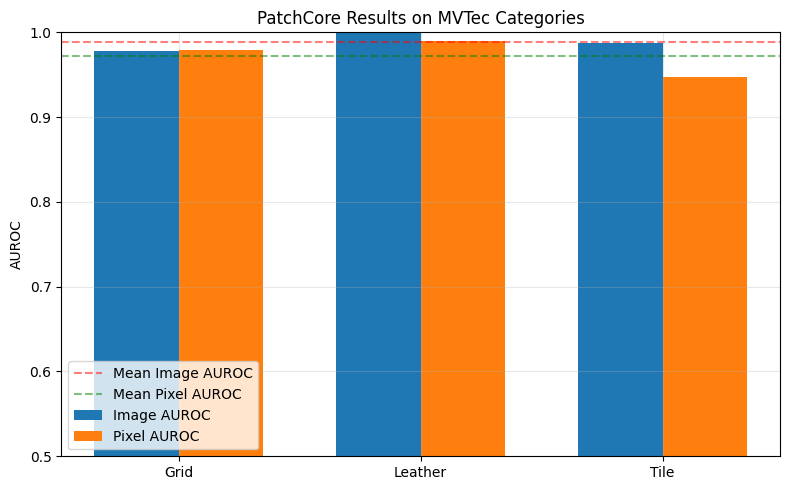

In [15]:
import matplotlib.pyplot as plt

categories = list(results.keys())
image_aurocs = [v["image_AUROC"] for v in results.values()]
pixel_aurocs = [v["pixel_AUROC"] for v in results.values()]

plt.figure(figsize=(8,5))
bar_width = 0.35
x = torch.arange(len(categories))

plt.bar(x - bar_width/2, image_aurocs, width=bar_width, label="Image AUROC")
plt.bar(x + bar_width/2, pixel_aurocs, width=bar_width, label="Pixel AUROC")

plt.axhline(image_mean, color='red', linestyle='--', alpha=0.5, label="Mean Image AUROC")
plt.axhline(pixel_mean, color='green', linestyle='--', alpha=0.5, label="Mean Pixel AUROC")

plt.xticks(x, [c.capitalize() for c in categories])
plt.ylim(0.5, 1.0)
plt.ylabel("AUROC")
plt.title("PatchCore Results on MVTec Categories")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
